<a href="https://colab.research.google.com/github/mirelahavran/P1-CS4501/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing Online Behavior for Public Health - Project 1

## Mirela Lynch
## 02/24/25



In [ ]:
import pandas as pd
import json
from datetime import datetime
import pytz
import matplotlib.pyplot as plt

# Safari History

In [ ]:
with open('Safari.json', 'r') as file: # using safari cause i dont have chrome data
    data = json.load(file)

safari_history = data['history']

In [ ]:
# setting up for time conversion
est = pytz.timezone('America/New_York')

def convert_time(microseconds):
    utc = datetime.utcfromtimestamp(microseconds / 1e6)  # convert to seconds
    return utc.replace(tzinfo=pytz.utc).astimezone(est) # time zone for VA

https://github.com/stub42/pytz

In [ ]:
df = pd.DataFrame(safari_history)

# a little clean up
df = df[['url', 'time_usec', 'visit_count', 'title']]

df['time'] = df['time_usec'].apply(convert_time)

df['date'] = df['time'].dt.date
df['hour'] = df['time'].dt.hour

df['time'] = df['time'].dt.strftime("%Y-%m-%d %H:%M:%S")

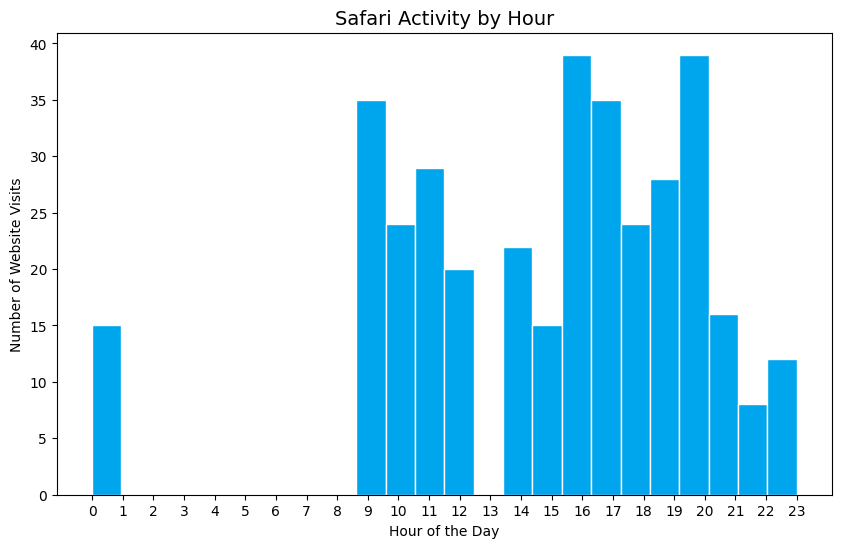

In [ ]:
plt.figure(figsize=(10, 6))
df['hour'].plot(kind='hist', bins=24, color='#00a6ed', edgecolor='white')

plt.title('Safari Activity by Hour', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=10)
plt.ylabel('Number of Website Visits', fontsize=10)
plt.xticks(range(0, 24))

plt.show()

In [ ]:
df['time (hours)'] = df['time_usec'].apply(lambda x: convert_time(x).hour + convert_time(x).minute / 60)

# adjusted date column for when staying up past midnight, i frequently do
df['adjusted date'] = df['time_usec'].apply(lambda x: convert_time(x).date())
df.loc[df['hour'] < 6, 'adjusted date'] = df['adjusted date'] - pd.Timedelta(days=1)

# bedtime: latest website visit from 6 PM to 5:59 AM
bedtime = df[(df['hour'] >= 18) | (df['hour'] < 6)].groupby('adjusted date')['time (hours)'].max()

# wake up: earliest website visit from 6 AM to 5:59 PM
wakeup = df[(df['hour'] >= 6) & (df['hour'] < 18)].groupby('date')['time (hours)'].min()

# new df w/ edits
sleep_data = pd.DataFrame({'bedtime': bedtime, 'wake up': wakeup}).reset_index()

average_bedtime = sleep_data['bedtime'].mean()
average_wakeup = sleep_data['wake up'].mean()

def format_time(time_value):
    hours = int(time_value)
    minutes = int((time_value - hours) * 60)
    return f"{hours:02d}:{minutes:02d}"

average_bedtime_str = format_time(average_bedtime)
average_wakeup_str = format_time(average_wakeup)

print(f'average bedtime: {average_bedtime_str}')
print(f'average wake up: {average_wakeup_str}')

average bedtime: 21:29
average wake up: 11:48


https://pandas.pydata.org/docs/reference/api/pandas.Timedelta.html



```
Average Bedtime: 21:29
Average Wake Up: 11:48
```



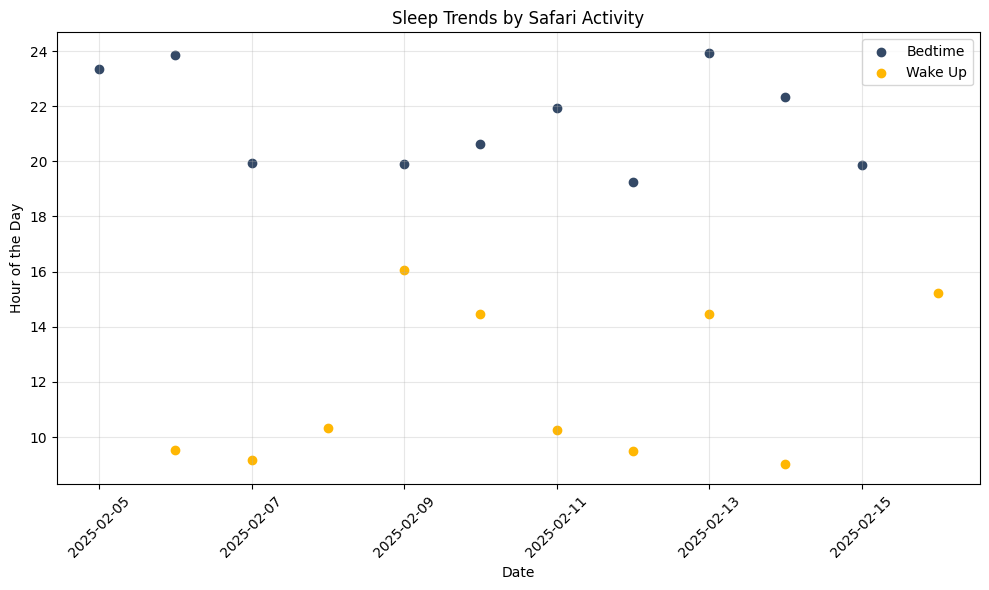

In [ ]:
sleep_data = sleep_data.rename(columns={'index': 'adjusted date'})

plt.figure(figsize=(10, 6))
plt.scatter(sleep_data['adjusted date'], sleep_data['bedtime'], label='Bedtime', color='#344966')
plt.scatter(sleep_data['adjusted date'], sleep_data['wake up'],label='Wake Up', color='#ffb703')

plt.xlabel('Date')
plt.ylabel('Hour of the Day')
plt.title('Sleep Trends by Safari Activity')

plt.legend()
plt.xticks(rotation=45)
plt.grid(alpha=0.3, linestyle='-')
plt.tight_layout()
plt.show()


## Youtube Watch History

In [ ]:
with open("watch-history.json", "r", encoding="utf-8") as file:
    youtube_data = json.load(file)

In [ ]:
yt_df = pd.DataFrame(youtube_data)

# use format='ISO8601', Colab suggested this
yt_df['time'] = pd.to_datetime(yt_df['time'], utc=True, format='ISO8601', errors='coerce')

yt_df['time'] = yt_df['time'].dt.tz_convert('US/Eastern')

start_date = pd.Timestamp('2025-01-01', tz='US/Eastern')
end_date = pd.Timestamp('2025-02-14', tz='US/Eastern')

# filer by date range above (just for the year)
filtered_yt_df = yt_df[(yt_df['time'] >= start_date) & (yt_df['time'] <= end_date)].copy()

filtered_yt_df['date'] = filtered_yt_df['time'].dt.date
filtered_yt_df['hour'] = filtered_yt_df['time'].dt.hour

In [ ]:
filtered_yt_df.head()

,header,title,titleUrl,subtitles,time,products,activityControls,description,details,date,hour
17,YouTube,"Watched most G.O.A.T.E.D push workout | chest,...",https://www.youtube.com/watch?v=wVuk-qznlEE,"[{'name': 'LeanBeefPatty', 'url': 'https://www...",2025-02-13 21:11:21.683000-05:00,[YouTube],[YouTube watch history],NaN,NaN,2025-02-13,21
18,YouTube,Watched Mental Health while Bulking,https://www.youtube.com/watch?v=7xKSIn8hG98,"[{'name': 'Georgia Daniels', 'url': 'https://w...",2025-02-13 21:10:56.997000-05:00,[YouTube],[YouTube watch history],NaN,NaN,2025-02-13,21
19,YouTube,Watched study then car accident then study,https://www.youtube.com/watch?v=ZNG4k3qrtdE,"[{'name': 'Kay Chung', 'url': 'https://www.you...",2025-02-13 21:10:13.461000-05:00,[YouTube],[YouTube watch history],NaN,NaN,2025-02-13,21
20,YouTube,Watched Crown Prince + All About Defense vs Of...,https://www.youtube.com/watch?v=ZABfYZDvLLA,NaN,2025-02-13 21:10:01.907000-05:00,[YouTube],"[Web & App Activity, YouTube watch history, Yo...",Watched at 9:10 PM,[{'name': 'From Google Ads'}],2025-02-13,21
21,YouTube,Watched PKTV 00091988 000262952,https://www.youtube.com/watch?v=wXMtwiF-tKA,NaN,2025-02-13 21:09:47.286000-05:00,[YouTube],"[Web & App Activity, YouTube watch history]",NaN,[{'name': 'From Google Ads'}],2025-02-13,21


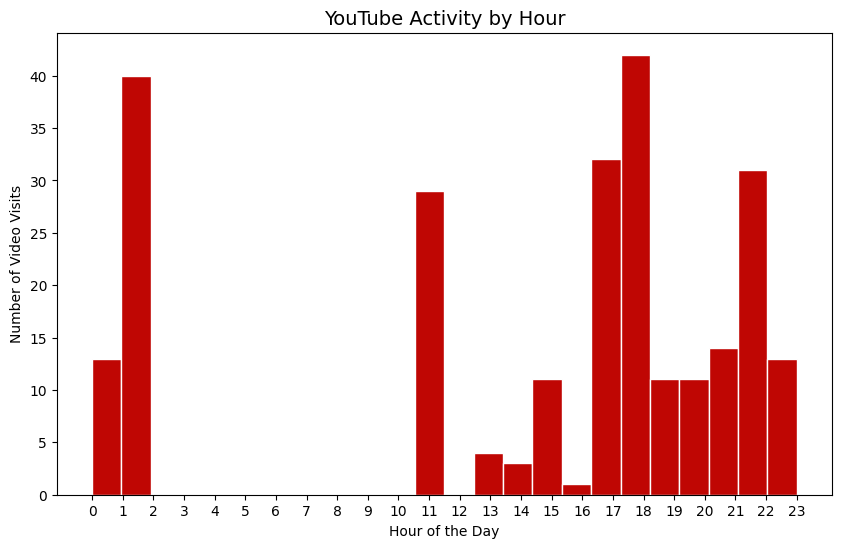

In [ ]:
plt.figure(figsize=(10, 6))
filtered_yt_df['hour'].plot(kind='hist', bins=24, color='#bf0603', edgecolor='white')

plt.title('YouTube Activity by Hour', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=10)
plt.ylabel('Number of Video Visits', fontsize=10)
plt.xticks(range(0, 24))

plt.show()

## Sleep Data Analysis

In [ ]:
sleep_df = pd.read_csv('sleep_data.csv')
sleep_df['Date'] = pd.to_datetime(sleep_df['Date'], format='%m/%d/%Y')

In [ ]:
sleep_df.head()

In [ ]:
sleep_df = sleep_df.dropna(subset=["Garmin Sleep", "Garmin Awake (Next Day)"])

sleep_df["Garmin Sleep"] = pd.to_datetime(sleep_df["Garmin Sleep"], format="%H:%M:%S")
sleep_df["Garmin Awake (Next Day)"] = pd.to_datetime(sleep_df["Garmin Awake (Next Day)"], format="%H:%M:%S")

sleep_df["Sleep Time (Hours)"] = sleep_df["Garmin Sleep"].dt.hour + sleep_df["Garmin Sleep"].dt.minute / 60
sleep_df["Awake Time (Hours)"] = sleep_df["Garmin Awake (Next Day)"].dt.hour + sleep_df["Garmin Awake (Next Day)"].dt.minute / 60

average_sleep = sleep_df["Sleep Time (Hours)"].mean()
average_awake = sleep_df["Awake Time (Hours)"].mean()

average_sleep_str = format_time(average_sleep) # format_time used previously
average_awake_str = format_time(average_awake)

print(f'Average Bedtime: {average_sleep_str}')
print(f'Average Wake Up: {average_awake_str}')



```
Average Bedtime: 01:29
Average Wake Up: 08:56
```



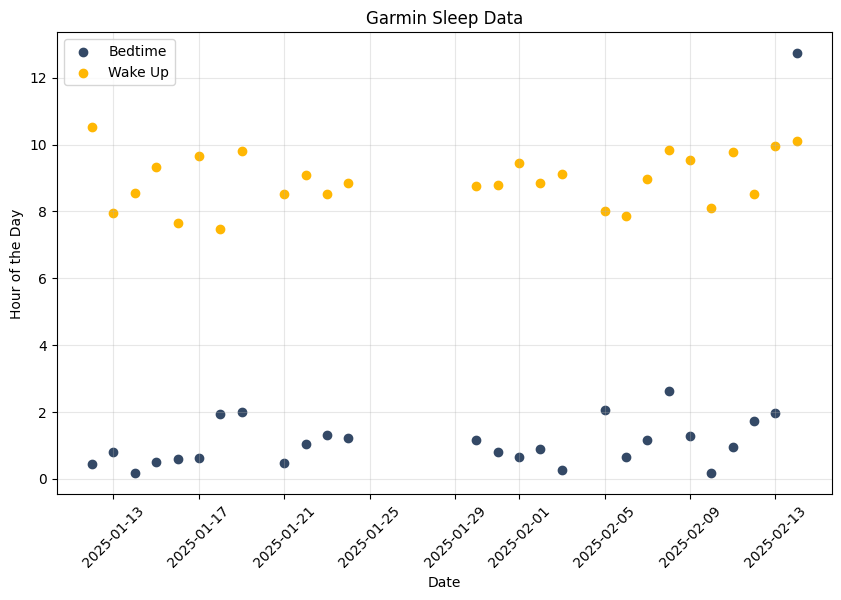

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(sleep_df['Date'], sleep_df['Garmin Sleep'].dt.hour + sleep_df['Garmin Sleep'].dt.minute/60, label='Bedtime', color='#344966')
plt.scatter(sleep_df['Date'], sleep_df['Garmin Awake (Next Day)'].dt.hour + sleep_df['Garmin Awake (Next Day)'].dt.minute/60, label='Wake Up', color='#ffb703')

plt.xlabel('Date')
plt.ylabel('Hour of the Day')
plt.title('Garmin Sleep Data')

plt.legend()
plt.xticks(rotation=45)
plt.grid(alpha=0.3, linestyle='-')

plt.show()